In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exam-score-prediction-dataset/Exam_Score_Prediction.csv


## importing important packages 

In [2]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from  sklearn.metrics import root_mean_squared_error as rmse , r2_score as  r2 
import sklearn.linear_model 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/kaggle/input/exam-score-prediction-dataset/Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# data preprocessing 

In [4]:
df.isna().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [5]:
df.describe(include = "all")

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
count,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000,20000.00000,20000,20000,20000,20000,20000.000000
unique,NaN,NaN,3,7,NaN,NaN,2,NaN,3,5,3,3,NaN
top,NaN,NaN,other,bca,NaN,NaN,yes,NaN,average,self-study,medium,moderate,NaN
freq,NaN,NaN,6726,2902,NaN,NaN,16988,NaN,6694,4079,6760,9878,NaN
mean,10000.504600,20.473300,NaN,NaN,4.007604,70.017365,NaN,7.00856,NaN,NaN,NaN,NaN,62.513225
std,5773.654959,2.284458,NaN,NaN,2.308313,17.282262,NaN,1.73209,NaN,NaN,NaN,NaN,18.908491
min,1.000000,17.000000,NaN,NaN,0.080000,40.600000,NaN,4.10000,NaN,NaN,NaN,NaN,19.599000
25%,5000.750000,18.000000,NaN,NaN,2.000000,55.100000,NaN,5.50000,NaN,NaN,NaN,NaN,48.800000
50%,10000.500000,20.000000,NaN,NaN,4.040000,69.900000,NaN,7.00000,NaN,NaN,NaN,NaN,62.600000
75%,15000.250000,22.000000,NaN,NaN,6.000000,85.000000,NaN,8.50000,NaN,NaN,NaN,NaN,76.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [7]:
df.drop("student_id" , axis = 1 )

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


# EDA

In [8]:
for cat in df.columns : 
    if df[cat].dtype== 'object' :
        j = 0
        inde = []
        result = df.groupby(cat).agg ({"exam_score" : ["mean" , "max", "min" , "sum"]}).sort_values( by = inde)
        print (result)
        inde.append(j)
        j+=1

       exam_score                           
             mean    max     min         sum
gender                                      
female  62.582145  100.0  19.599  411727.932
male    62.397480  100.0  19.599  417751.129
other   62.561023  100.0  19.599  420785.439
        exam_score                           
              mean    max     min         sum
course                                       
b.com    62.333197  100.0  19.599  178522.277
b.sc     62.718993  100.0  19.599  180505.263
b.tech   62.653529  100.0  19.599  175304.575
ba       62.112214  100.0  19.599  179876.972
bba      62.928127  100.0  19.599  178464.169
bca      62.524078  100.0  19.599  181444.875
diploma  62.330633  100.0  19.599  176146.369
                exam_score                            
                      mean    max     min          sum
internet_access                                       
no               62.864663  100.0  19.599   189348.365
yes              62.450914  100.0  19.599  1060916

In [9]:
df = df.drop("student_id" , axis = 1)

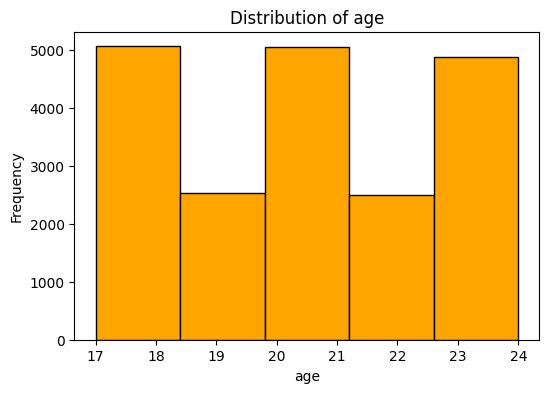

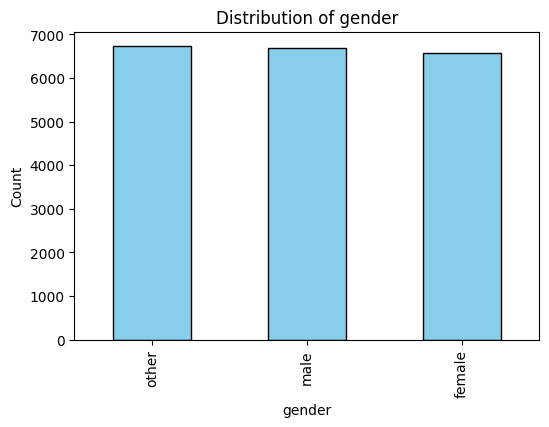

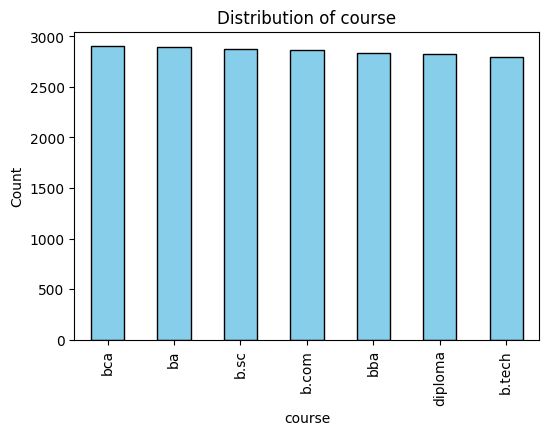

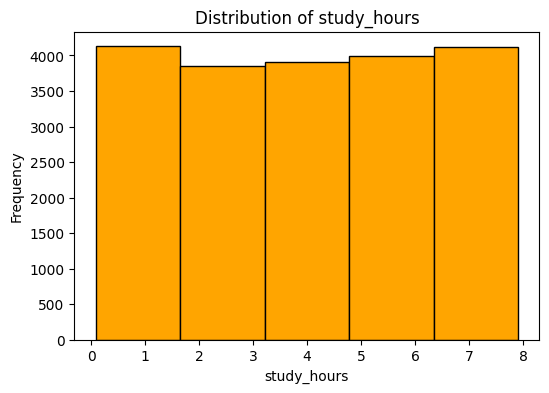

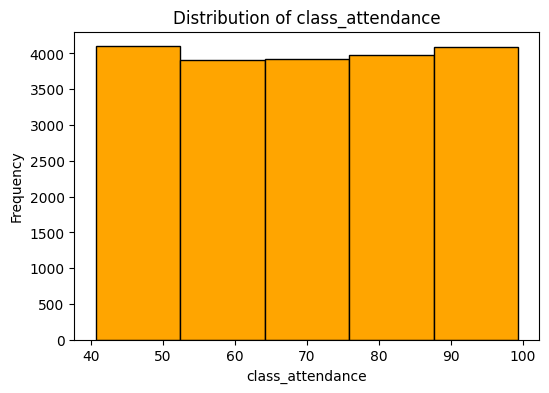

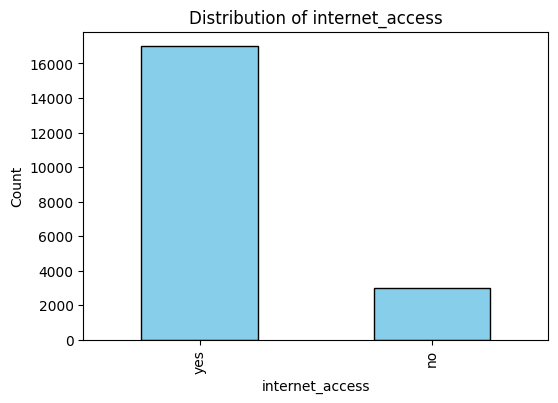

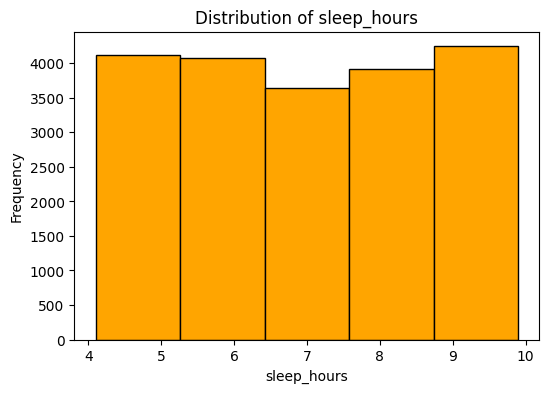

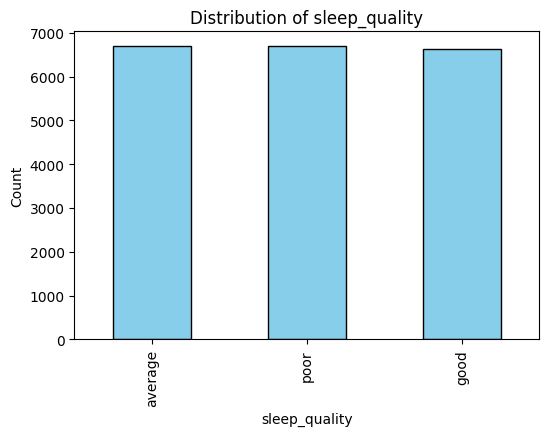

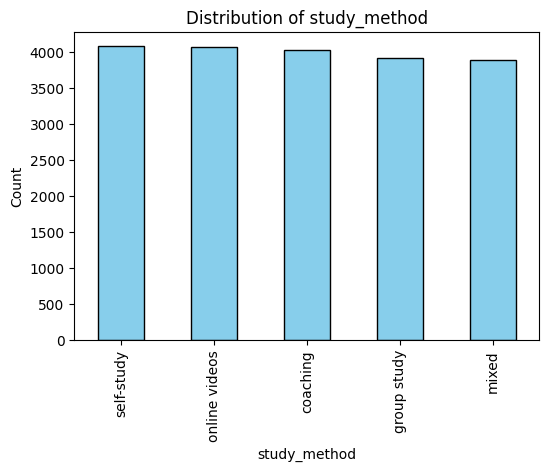

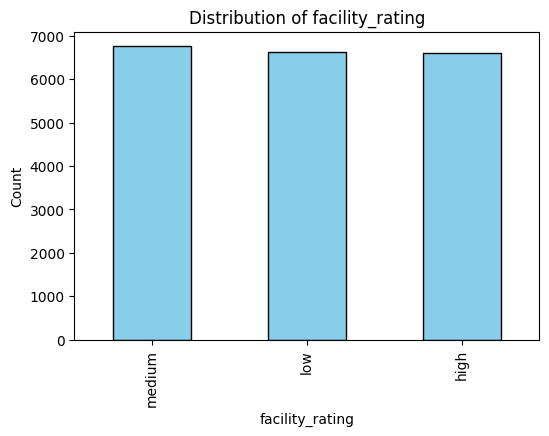

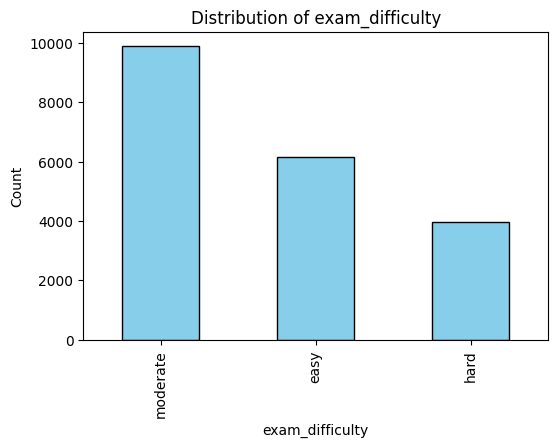

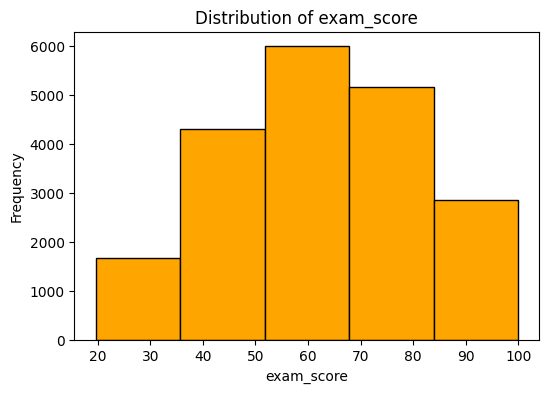

In [10]:

for col in df.columns:
    plt.figure(figsize=(6,4))
    
    if df[col].dtype == 'object':  # categorical column
        df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    else:  # numeric column
        plt.hist(df[col], bins=5, color='orange', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.show()

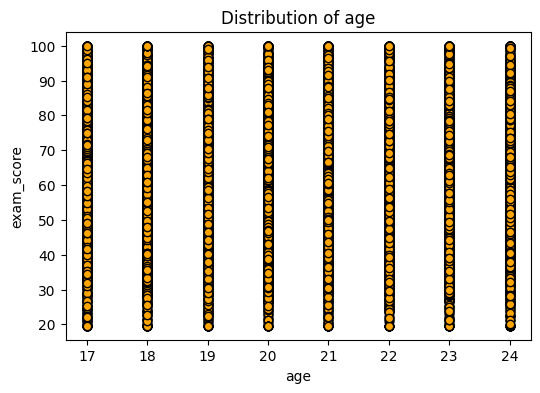

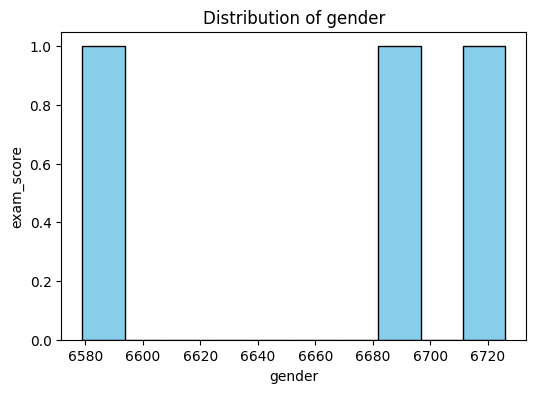

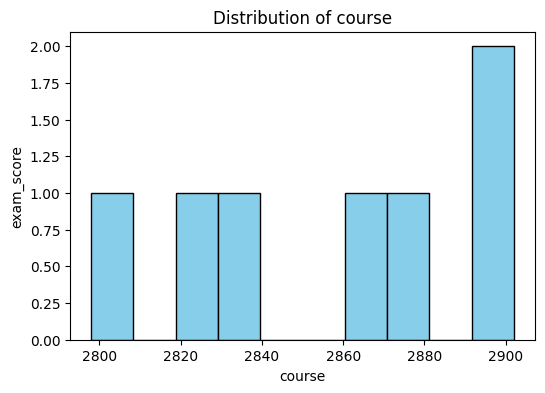

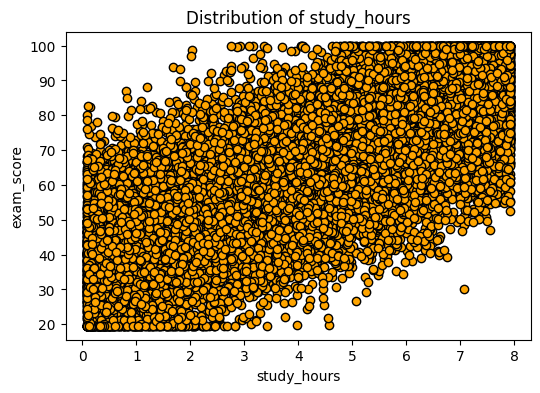

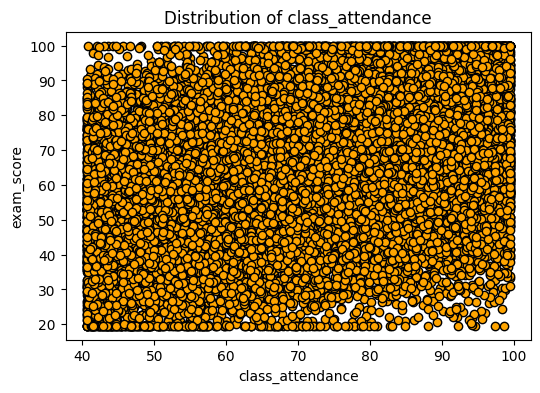

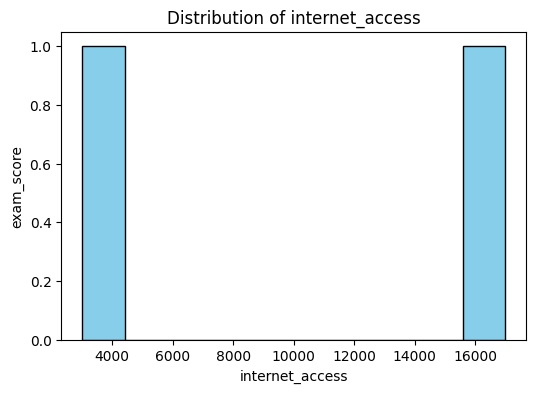

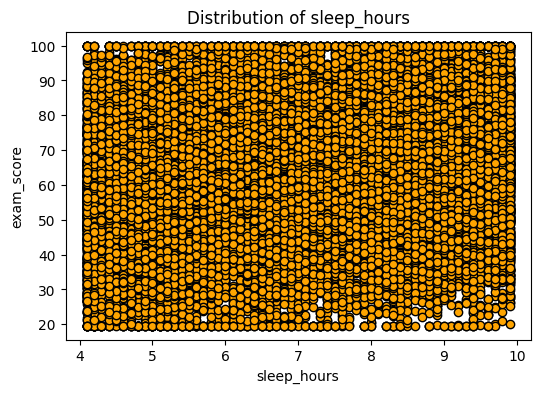

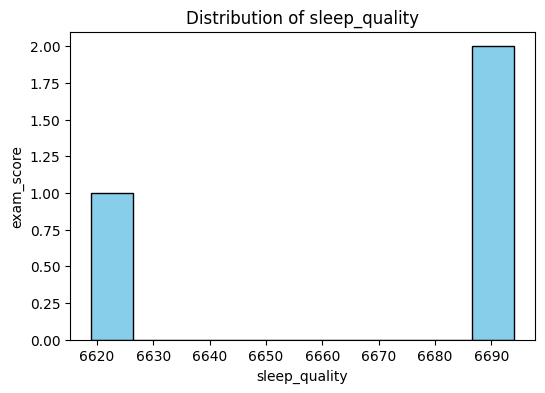

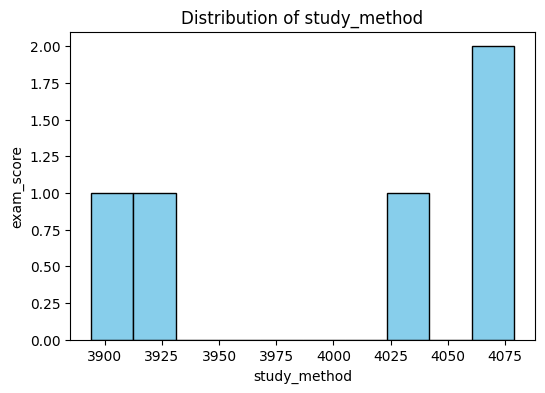

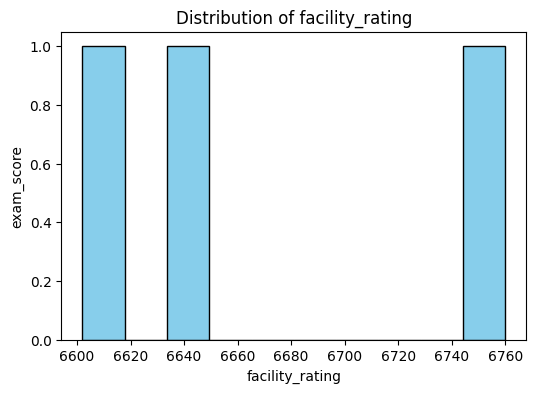

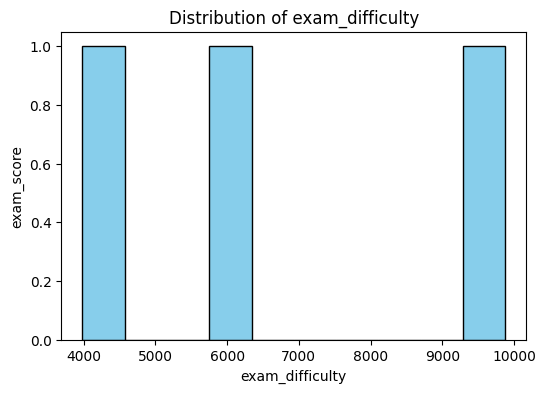

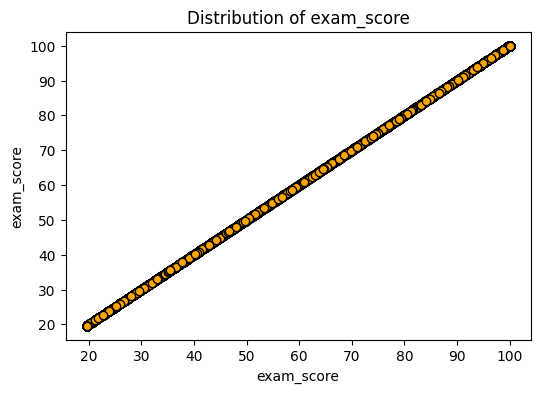

In [11]:
df.drop("exam_score" , axis = 1 )
for col in df.columns:
    plt.figure(figsize=(6,4))
    
    if df[col].dtype == 'object':  # categorical column
        df[col].value_counts().plot(kind='hist', color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('exam_score')
    else:  # numeric column
        plt.scatter(df[col],df["exam_score"] , color='orange', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('exam_score')
    
    plt.show()

<Axes: >

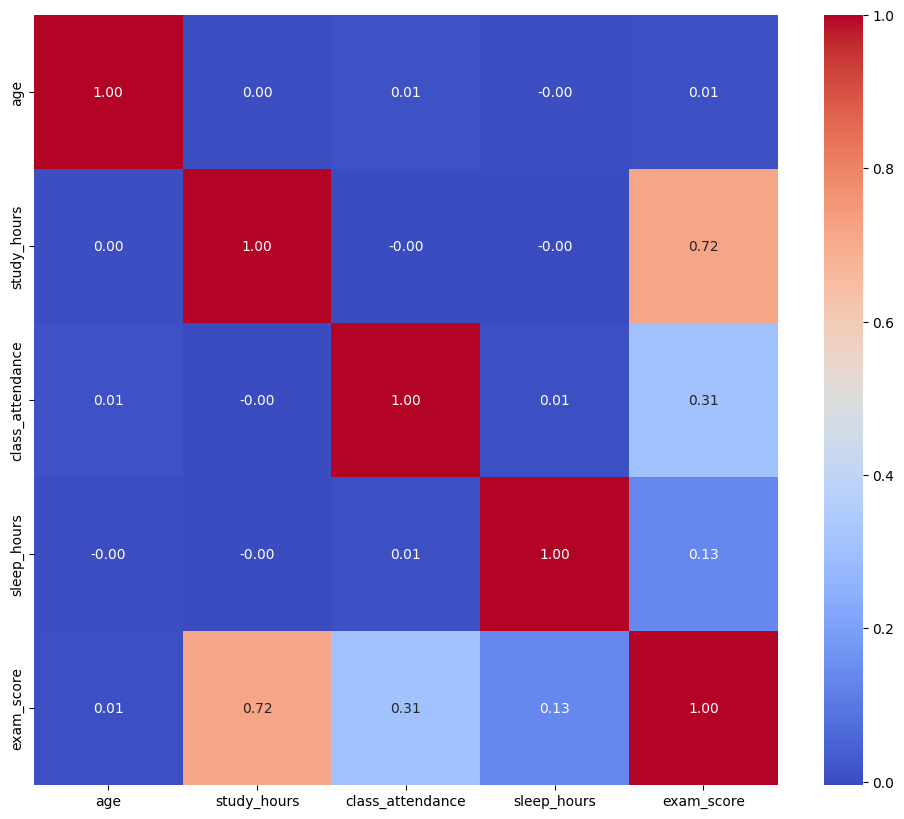

In [12]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm')

In [13]:
df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [14]:
df.study_method.unique()

array(['coaching', 'online videos', 'mixed', 'self-study', 'group study'],
      dtype=object)

In [15]:
# onehot = df[["gender" , "internet_access"]]
ordinal = df[["facility_rating" , "sleep_quality" , "exam_difficulty" , "gender" , "internet_access" ]]
freq = df[["study_method" , "course"]]

# encoding 

In [16]:
freqencode = df.study_method.value_counts().to_dict()
freqencode2 = df.course.value_counts().to_dict()

In [17]:
df.study_method = df["study_method"].map(freqencode)
df.course = df.course.map(freqencode2)

internet_access sleep_quality facility_rating exam_difficulty gender

In [18]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,2826,2.78,92.9,yes,7.4,poor,4036,low,hard,58.9
1,23,other,2902,3.37,64.8,yes,4.6,average,4069,medium,moderate,54.8
2,22,male,2878,7.88,76.8,yes,8.5,poor,4036,high,moderate,90.3
3,20,other,2826,0.67,48.4,yes,5.8,average,4069,low,moderate,29.7
4,20,female,2826,0.89,71.6,yes,9.8,poor,4036,low,moderate,43.7


In [19]:
df.facility_rating.value_counts()

facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

### ordinal encoding

In [20]:
sleep_quality_order =["poor" , "average" , "good"]
exam_difficulty_order  = ["easy" , "moderate"  , "hard"]
facility_rating_order = ["low" , "medium" , "high"]

In [21]:
df.internet_access.value_counts()

internet_access
yes    16988
no      3012
Name: count, dtype: int64

In [22]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,2826,2.78,92.9,yes,7.4,poor,4036,low,hard,58.9
1,23,other,2902,3.37,64.8,yes,4.6,average,4069,medium,moderate,54.8
2,22,male,2878,7.88,76.8,yes,8.5,poor,4036,high,moderate,90.3
3,20,other,2826,0.67,48.4,yes,5.8,average,4069,low,moderate,29.7
4,20,female,2826,0.89,71.6,yes,9.8,poor,4036,low,moderate,43.7


In [23]:
print(f"{df.groupby("facility_rating") ["exam_score"].mean()}  \n {df.groupby("gender") ["exam_score"].mean()} \n {df.groupby("exam_difficulty") ["exam_score"].mean()} \n {df.groupby("sleep_quality") ["exam_score"].mean()} " )

facility_rating
high      66.165916
low       58.594346
medium    62.794061
Name: exam_score, dtype: float64  
 gender
female    62.582145
male      62.397480
other     62.561023
Name: exam_score, dtype: float64 
 exam_difficulty
easy        62.383022
hard        62.629580
moderate    62.547277
Name: exam_score, dtype: float64 
 sleep_quality
average    62.530512
good       67.138598
poor       57.917582
Name: exam_score, dtype: float64 


we will need facility_rating  and sleep_quality 

In [24]:
facility_mapping = {"low" : 0 , "medium" : 1 , "high" : 2 }
df["facility_rating"] = df.facility_rating.map(facility_mapping)

In [25]:
sleep_quality_mapping = {"poor" : 0 , "average" : 1 , "good" : 2}
df["sleep_quality"] = df.sleep_quality.map(sleep_quality_mapping) 

In [26]:
df['internet_access'] = df.internet_access.map({"yes": 1 ,"no" :  0 })


In [27]:
df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,2826,2.78,92.9,1,7.4,0,4036,0,hard,58.9
1,23,other,2902,3.37,64.8,1,4.6,1,4069,1,moderate,54.8
2,22,male,2878,7.88,76.8,1,8.5,0,4036,2,moderate,90.3
3,20,other,2826,0.67,48.4,1,5.8,1,4069,0,moderate,29.7
4,20,female,2826,0.89,71.6,1,9.8,0,4036,0,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,2836,6.50,71.3,1,5.0,2,4079,0,easy,86.5
19996,18,male,2864,3.71,41.6,0,5.9,1,4036,1,moderate,60.9
19997,19,other,2826,7.88,68.2,1,4.6,0,3922,0,easy,64.5
19998,19,male,2836,4.60,76.3,0,6.1,2,4079,1,moderate,79.0


<Axes: >

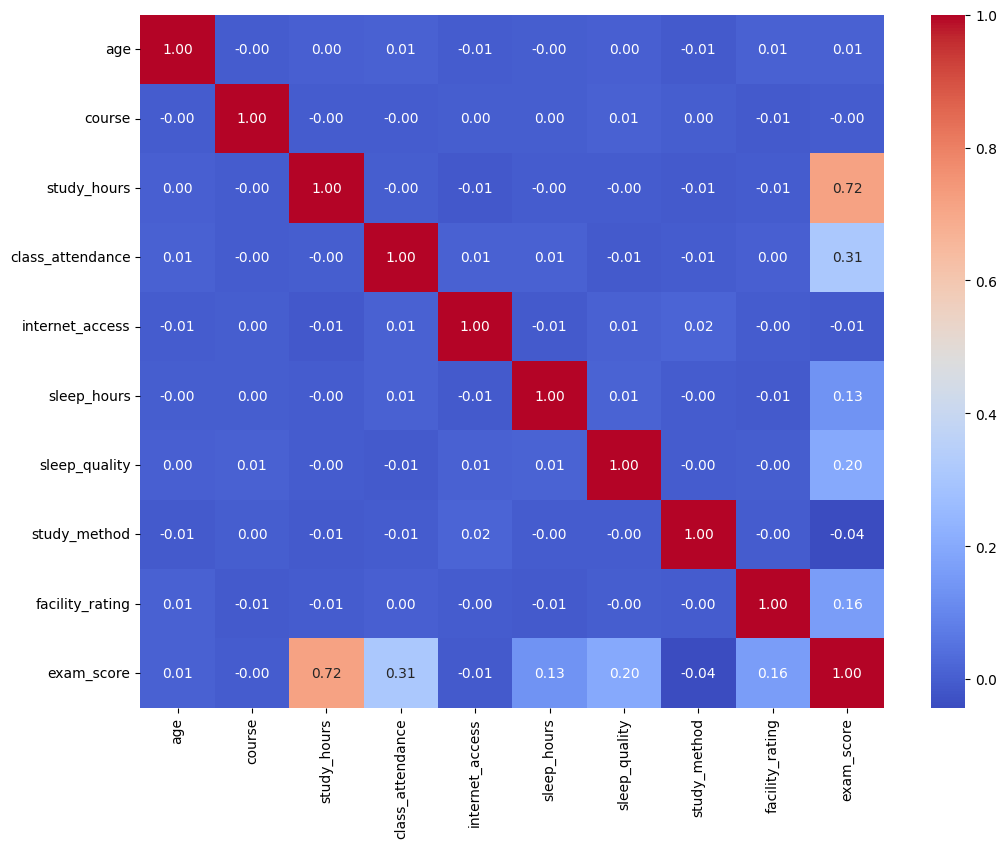

In [28]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm')

In [29]:
X = df[["study_hours" , "class_attendance" , "sleep_hours"]]
y = df["exam_score"]
lin_model=LinearRegression()

In [30]:
from sklearn.model_selection import train_test_split , cross_validate
X_train , X_test  , y_train  , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 , shuffle = True)

In [31]:
cv_scores = cross_validate(lin_model , X_train , y_train , cv = 5,  scoring ={"r2" :"r2" , "rmse":"neg_root_mean_squared_error"})

In [32]:

print("Cross-validation R^2 scores:", cv_scores ['test_r2'])
print("Mean CV R^2:", cv_scores['test_r2'].mean())

print("Cross-validation RMSE scores:", cv_scores['test_rmse'])
print("Mean CV RMSE:", cv_scores['test_rmse'].mean())


Cross-validation R^2 scores: [0.64022803 0.62508916 0.63215537 0.61794862 0.62935076]
Mean CV R^2: 0.628954389745787
Cross-validation RMSE scores: [-11.47003683 -11.42280845 -11.4205069  -11.57930076 -11.67707719]
Mean CV RMSE: -11.51394602764304


In [33]:
lin_model.fit(X_train , y_train)
y_pred = lin_model.predict(X_test) 

In [34]:
rmse(y_test , y_pred)

11.510488783827912

In [35]:
lin_model.predict(pd.DataFrame({
    'study_hours': [1],
    'class_attendance': [80],
    'sleep_hours': [1]   # assuming 0=poor, 1=fair, 2=good, 3=excellent
})
)

array([39.73407523])